# TECH CHALLENGE

Tech Challenge é o projeto que engloba os conhecimentos obtidos em todas as disciplinas dessa fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo. É importante atentar-se ao prazo de entrega, uma vez que essa atividade é obrigatória, valendo 90% da nota de todas as disciplinas da fase.

## O problema
Você é um(a) profissional encarregado(a) de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.
A base de dados para este desafio pode ser algo como o demonstrado no exemplo a seguir:

```js
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```
Você precisa apenas a alimentar com mais informações ou utilizar outra de sua preferência.

## Tarefas
1. Exploração de dados:
   * Carregue a base de dados e explore suas características;
   * Analise estatísticas descritivas e visualize distribuições relevantes.
    
2. Pré-processamento de dados:
   * Realize a limpeza dos dados, tratando valores ausentes (se necessário);
   * Converta variáveis categóricas em formatos adequados para modelagem.
    
3. Modelagem:
   * Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);
   * Divida o conjunto de dados em conjuntos de treinamento e teste.
    
4. Treinamento e avaliação do modelo:
   * Treine o modelo com o conjunto de treinamento.
    
5. Validação estatística:
   * Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).


## Sobre a base de dados

Este conjunto de dados contém informações detalhadas sobre os custos médicos de indivíduos no período de 2010 a 2020. Ele inclui diversos atributos, como idade, sexo, IMC, número de filhos, status de fumante e região. Esses atributos são essenciais para entender os fatores que influenciam os custos médicos e podem ser utilizados para modelagem preditiva, análise estatística e fins de pesquisa.

## Características do Conjunto de Dados

- **Idade:** Idade do indivíduo (variando de 18 a 65 anos).  
- **Sexo:** Gênero do indivíduo (masculino ou feminino).  
- **IMC:** Índice de Massa Corporal do indivíduo, indicando o nível de obesidade (variando de 15 a 40).  
- **Filhos:** Número de filhos cobertos pelo plano de saúde (variando de 0 a 5).  
- **Fumante:** Status de fumante do indivíduo (sim ou não).  
- **Região:** Área residencial nos EUA (nordeste, noroeste, sudeste, sudoeste).  
- **Custo Médico:** Custos médicos anuais incorridos pelo indivíduo (em dólares americanos - USD).

---

Este conjunto de dados é uma coleção abrangente de 10.000 registros, proporcionando uma base sólida para diversas tarefas de análise de dados. É especialmente útil para cientistas de dados, pesquisadores e estudantes que desejam explorar e prever os custos médicos com base em diferentes fatores demográficos e de estilo de vida.

Origem: https://www.kaggle.com/datasets/waqi786/medical-costs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("medical_costs.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [3]:
df.shape

(10000, 7)

In [4]:
# Sem necessidade de conversão para numérico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [5]:
# Sem valores nulos:
df.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Distribuição das variáveis quantitativas para descoberta da variação de amplitude dos dados

In [7]:
df.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


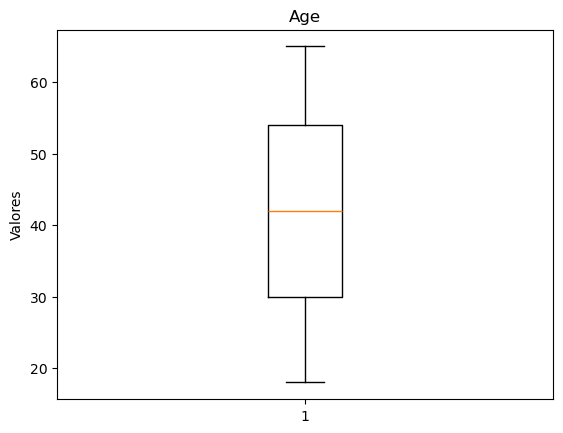

In [8]:
# Idade do indivíduo (variando de 18 a 65 anos). 
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

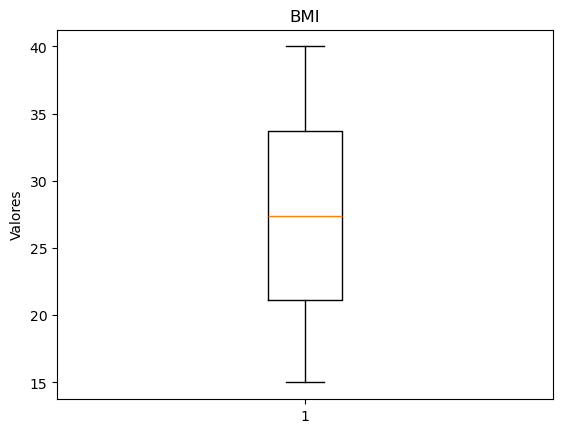

In [9]:
# Índice de Massa Corporal do indivíduo, indicando o nível de obesidade (variando de 15 a 40).
plt.boxplot(df['BMI'])
plt.title('BMI')
plt.ylabel('Valores')
plt.show()

### Relação de cada variável com os custos médicos

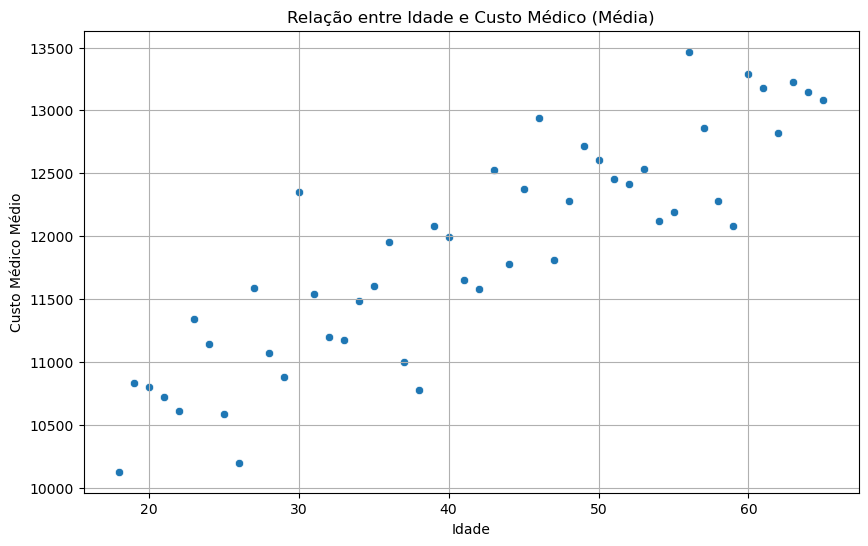

In [10]:
# Como a idade afeta o custo médico?
import seaborn as sns

# Média de custo por idade
avg_cost_by_age = df.groupby('Age')['Medical Cost'].mean()

# Resetar o índice para transformar a série em DataFrame
avg_cost_by_age = avg_cost_by_age.reset_index()

# gráfico de dispersão (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_cost_by_age, x='Age', y='Medical Cost')
plt.title('Relação entre Idade e Custo Médico (Média)')
plt.xlabel('Idade')
plt.ylabel('Custo Médico Médio')
plt.grid(True)
plt.show()

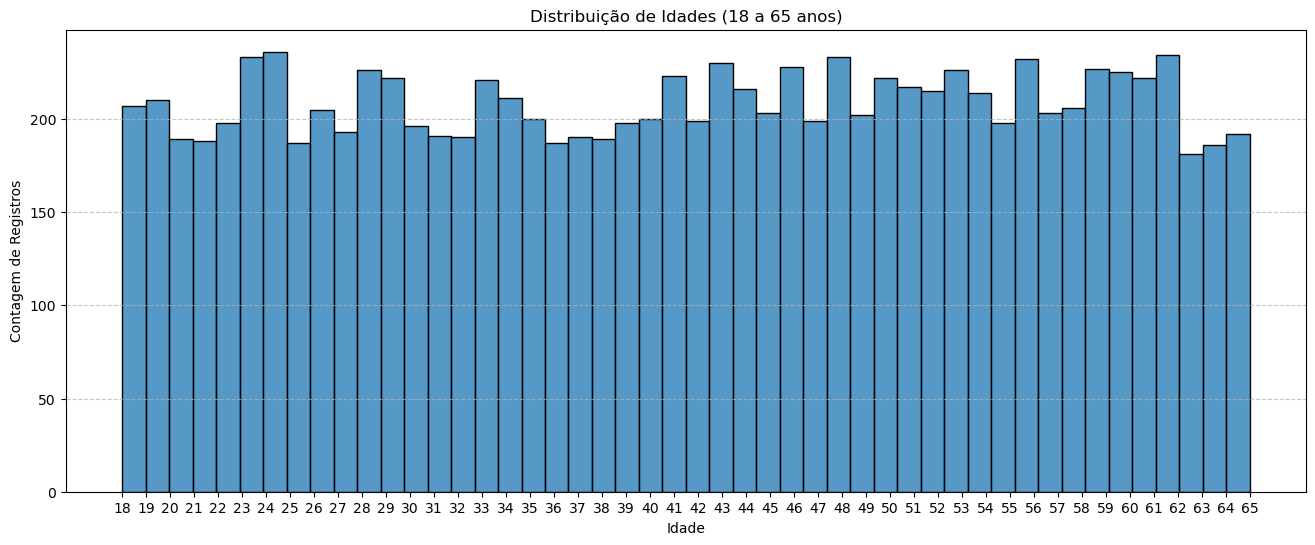

In [11]:
# Mostra se a distribuição da variável 'Age' está equilibrada
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Age', bins=len(df['Age'].unique()), kde=False)

# Ajustar o eixo x para mostrar todas as idades (de 18 a 65)
plt.xticks(range(18, 66))
plt.title("Distribuição de Idades (18 a 65 anos)")
plt.xlabel("Idade")
plt.ylabel("Contagem de Registros")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

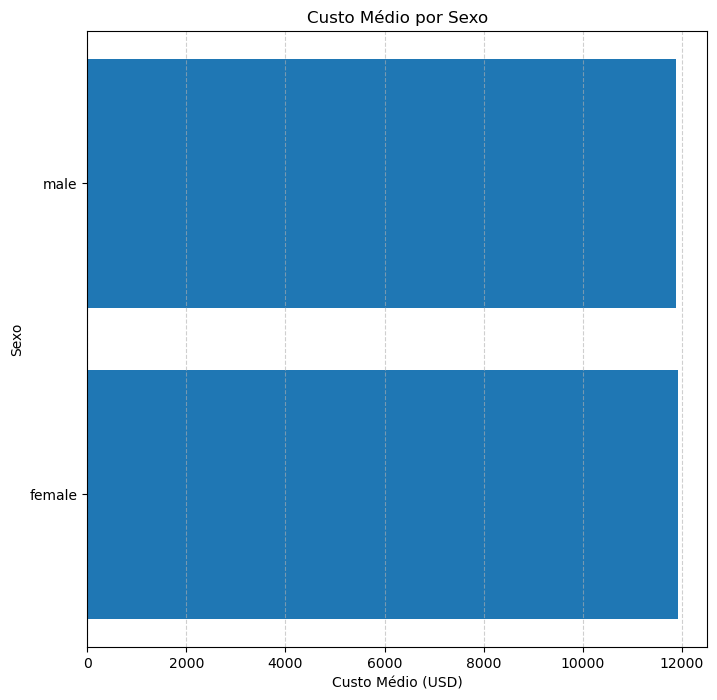

In [12]:
# Como o sexo afeta o custo médico?
# Média de custo por sexo
avg_cost_by_sex = df.groupby('Sex')['Medical Cost'].mean()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 8))
plt.barh(avg_cost_by_sex.index, avg_cost_by_sex.values)

# Títulos e rótulos
plt.xlabel('Custo Médio (USD)')
plt.ylabel('Sexo')
plt.title('Custo Médio por Sexo')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.show()

In [13]:
df['Sex'].value_counts()

Sex
female    5034
male      4966
Name: count, dtype: int64

In [14]:
# Contar quantos registros existem para cada idade
df['BMI'].value_counts()


BMI
31.5    58
35.1    58
17.3    55
34.1    54
15.1    54
        ..
32.6    27
33.8    27
35.5    26
40.0    24
15.0    23
Name: count, Length: 251, dtype: int64

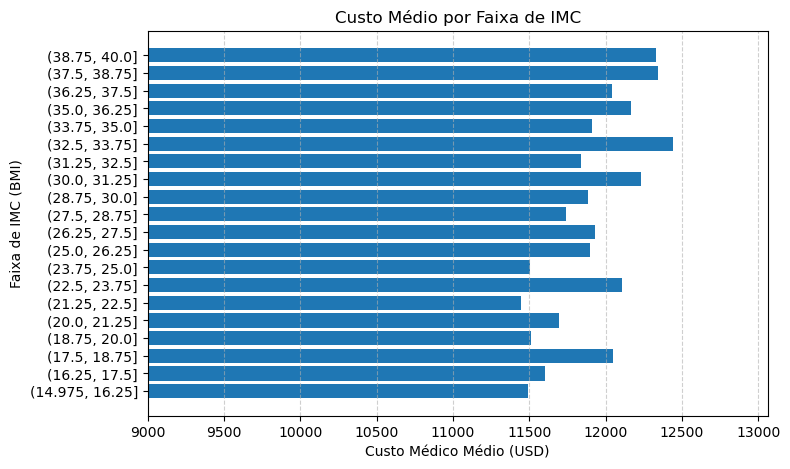

In [15]:
# Como o IMC afeta o custo médico?
# 20 intervalos iguais entre 15 e 40
df['BMI Faixa'] = pd.cut(df['BMI'], bins=20)

# Calcular a média do custo médico por faixa de BMI
# observed=True: só agrupa pelas categorias presentes nos dados
avg_cost_by_bmi_range = df.groupby('BMI Faixa', observed=True)['Medical Cost'].mean()

# Criar o gráfico
plt.figure(figsize=(8, 5))
plt.barh(avg_cost_by_bmi_range.index.astype(str), avg_cost_by_bmi_range.values)

# Títulos e rótulos
plt.xlabel('Custo Médico Médio (USD)')
plt.ylabel('Faixa de IMC (BMI)')
plt.title('Custo Médio por Faixa de IMC')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustar o eixo X para iniciar em 9000
plt.xlim(left=9000)

plt.show()
# Remove coluna
df.drop('BMI Faixa', axis=1, inplace=True)

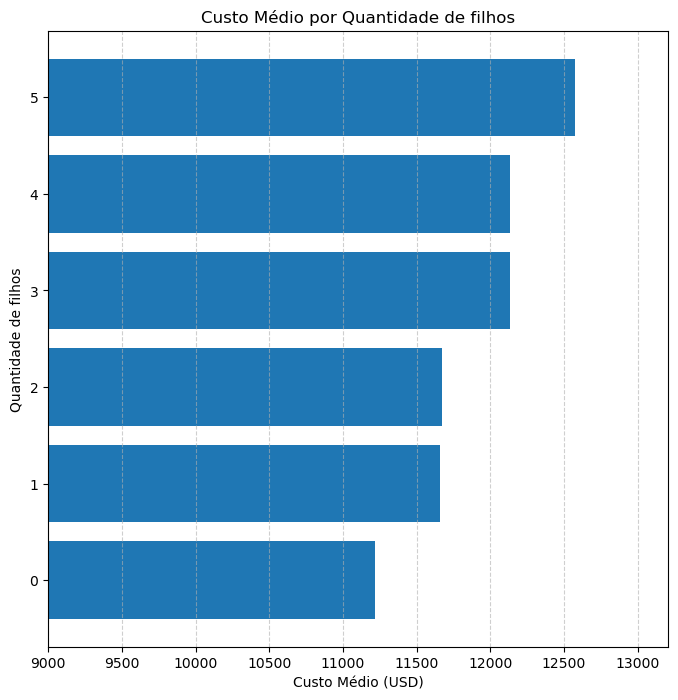

In [16]:
# Como a quantidade e filhos afeta o custo médico?
# Média de custo por quantidade de filhos
avg_cost_by_children = df.groupby('Children')['Medical Cost'].mean()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 8))
plt.barh(avg_cost_by_children.index, avg_cost_by_children.values)

# Títulos e rótulos
plt.xlabel('Custo Médio (USD)')
plt.ylabel('Quantidade de filhos')
plt.title('Custo Médio por Quantidade de filhos')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustar o eixo X para iniciar em 9000
plt.xlim(left=9000)

# Exibindo o gráfico
plt.show()

In [17]:
df['Children'].value_counts()

Children
2    1692
1    1683
3    1679
5    1665
4    1647
0    1634
Name: count, dtype: int64

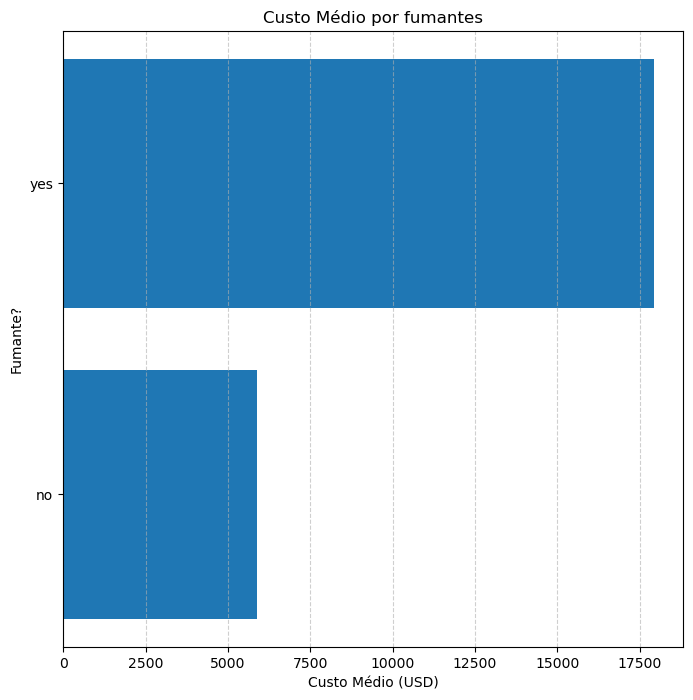

In [18]:
# Como o status de fumante afeta o custo médico?
# Média de custo por fumante
avg_cost_by_smoker = df.groupby('Smoker')['Medical Cost'].mean()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 8))
plt.barh(avg_cost_by_smoker.index, avg_cost_by_smoker.values)

# Títulos e rótulos
plt.xlabel('Custo Médio (USD)')
plt.ylabel('Fumante?')
plt.title('Custo Médio por fumantes')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.show()

In [19]:
df['Smoker'].value_counts()

Smoker
no     5008
yes    4992
Name: count, dtype: int64

## Buscando correlações

<Axes: >

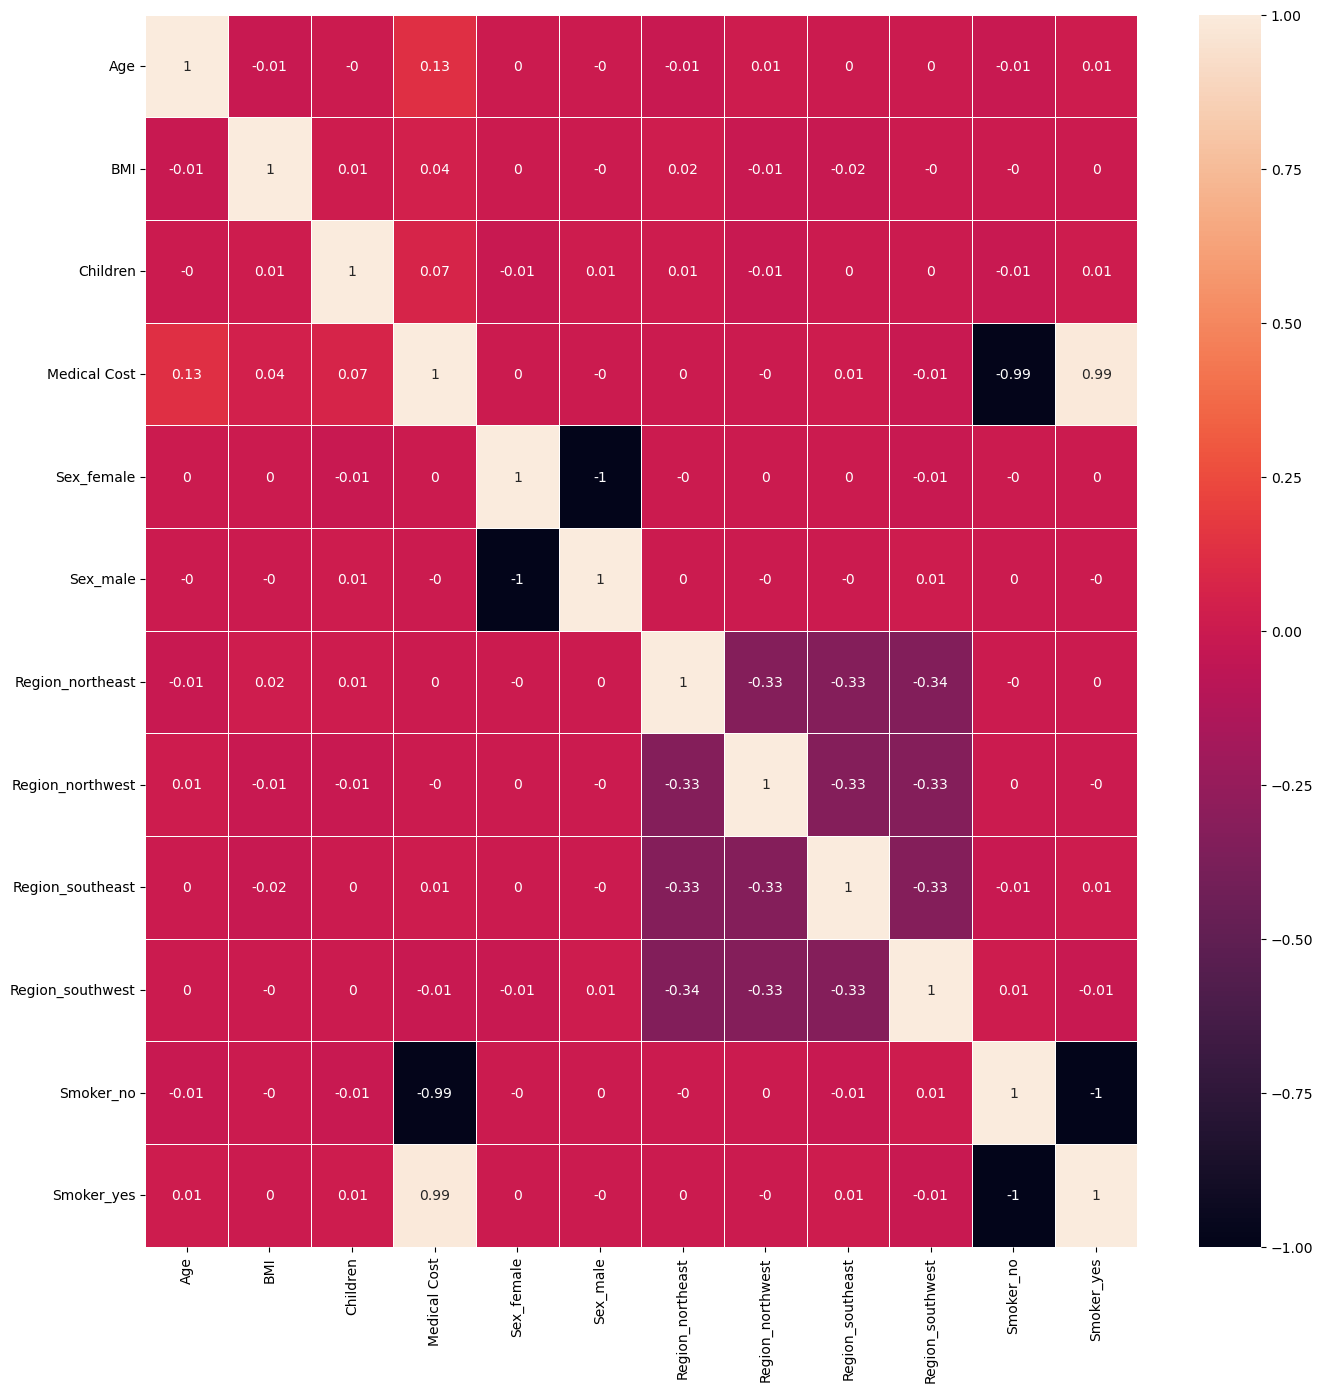

In [20]:
import seaborn as sns

# One-Hot Encoding (cria colunas binárias para cada categoria),
# necessário porque df.corr ignora automaticamente colunas com valores não numéricos
df2 = pd.get_dummies(df, columns=['Sex', 'Region', 'Smoker'])

# Matriz de correlação
correlation_matrix = df2.corr().round(2)

fig, ax = plt.subplots(figsize=(16,16))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Separação dos dados de treino e teste 

In [21]:
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [22]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Medical Cost'], axis=1)
y = df['Medical Cost'] # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Transforma rótulos de classes em números inteiros

In [23]:
# One-Hot Encoding (cria colunas binárias para cada categoria)
# Apenas para compreensão do funcionamento
x_train_encoded = pd.get_dummies(x_train, columns=['Sex', 'Region', 'Smoker'])
x_test_encoded = pd.get_dummies(x_test, columns=['Sex', 'Region', 'Smoker'])

In [24]:
x_train_encoded.head()

,Age,BMI,Children,Sex_female,Sex_male,Region_northeast,Region_northwest,Region_southeast,Region_southwest,Smoker_no,Smoker_yes
9254,34,35.0,5,False,True,True,False,False,False,True,False
1561,64,35.1,4,False,True,True,False,False,False,False,True
1670,34,21.7,5,False,True,False,False,True,False,False,True
6087,55,31.1,2,False,True,True,False,False,False,True,False
6669,38,38.1,1,True,False,True,False,False,False,False,True


## Padronização

In [25]:
# Apenas para compreensão do funcionamento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_encoded)

x_train_scaled = scaler.transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

In [26]:
x_train_scaled

array([[-0.55338227,  1.04408645,  1.46326866, ..., -0.58389378,
         1.00225254, -1.00225254],
       [ 1.6166379 ,  1.05787118,  0.87634716, ..., -0.58389378,
        -0.99775253,  0.99775253],
       [-0.55338227, -0.78928261,  1.46326866, ..., -0.58389378,
        -0.99775253,  0.99775253],
       ...,
       [ 0.09762378, -1.03740775,  0.87634716, ...,  1.71264026,
         1.00225254, -1.00225254],
       [-1.63839235, -1.5198733 ,  0.87634716, ..., -0.58389378,
        -0.99775253,  0.99775253],
       [ 0.3146258 , -0.51358802,  0.28942566, ..., -0.58389378,
         1.00225254, -1.00225254]])

### Pipeline de pré-processamento

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_preprocessing_pipeline():
    """
    Cria um pipeline de pré-processamento que realiza:
    1. One-Hot Encoding para colunas categóricas ('Sex', 'Region', 'Smoker')
    2. Padronização (StandardScaler) para todas as features
    
    Retorna:
        Pipeline pré-configurado
    """
    # Definir colunas categóricas e numéricas
    categorical_cols = ['Sex', 'Region', 'Smoker']
    numeric_cols = ['Age', 'BMI', 'Children']
    
    # Criar transformadores para cada tipo de dado
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    # Combinar transformadores em um ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Criar pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    return pipeline

In [28]:
pipeline = create_preprocessing_pipeline()
pipeline.fit(x_train)

# Aplicar as transformações
x_train_processed = pipeline.transform(x_train)
x_test_processed = pipeline.transform(x_test)  

In [29]:
# Salva o pipeline (Opcional)
# from joblib import dump, load
from joblib import dump
import sklearn

# Exportar o pipeline treinado para um arquivo
dump(pipeline, f'pipeline_treinado_sklearn_{sklearn.__version__}.joblib')

# Para carregar posteriormente:
# pipeline_carregado = load('pipeline_treinado_sklearn_1.3.1.joblib')

['pipeline_treinado_sklearn_1.3.1.joblib']

## Modelos para previsão do target
### Regressão linear

In [30]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train_processed, y_train)

# Fazer previsões no conjunto de teste
lr_y_pred = lr_model.predict(x_test_processed)

#### Avaliando os resultados

Vamos avaliar o modelo com as seguintes métricas:

O **RMSE** é a raiz quadrada do **MSE** *(Erro Quadrático Médio - Mean Squared Error)*. o **MSE** é a média dos quadrados das diferenças entre os valores reais e os valores previstos.

O **MAE** *(Erro Médio Absoluto - Mean Absolute Error)*, onde um valor pequeno para MAE significa que suas previsões estão próximas das reais.

O **"R-squared (R2)"** fornece informações sobre o ajuste geral do modelo. O valor do R2 pode variar entre 0 e 1, quanto mais próximo de 1, melhor, pois indica que o modelo explica uma maior proporção da variabilidade nos dados. O R2 é também uma das principais métricas de avaliação do modelo de regressão.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, lr_y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, lr_y_pred)
r_quadrado = r2_score(y_test, lr_y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 84926.73518794573
Erro Absoluto Médio: 252.9386232061853
R² (coeficiente de determinação): 0.997689685176468


### Árvores de Decisão para Regressão

In [32]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_depth=10)
dtr_model.fit(x_train_processed, y_train)

# Fazer previsões no conjunto de teste
dtr_y_pred = dtr_model.predict(x_test_processed)

#### Resultados

In [33]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, dtr_y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, dtr_y_pred)
r_quadrado = r2_score(y_test, dtr_y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 122389.6186562878
Erro Absoluto Médio: 290.3350301129022
R² (coeficiente de determinação): 0.9966705590459554


### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_processed, y_train)

# Fazer previsões no conjunto de teste
rf_y_pred = rf_model.predict(x_test_processed)

#### Resultados

In [35]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, rf_y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, rf_y_pred)
r_quadrado = r2_score(y_test, rf_y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 104665.56894287256
Erro Absoluto Médio: 273.200096268988
R² (coeficiente de determinação): 0.9971527173992148


### Gradient Boosting Regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train_processed, y_train)

# Fazendo previsões
gb_y_pred = gb_model.predict(x_test_processed)

#### Resultados

In [37]:
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, gb_y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, gb_y_pred)
r_quadrado = r2_score(y_test, gb_y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 86937.07490879198
Erro Absoluto Médio: 254.90479863201188
R² (coeficiente de determinação): 0.9976349966540948


### Resultado final

In [38]:
print(f'LinearRegression: {r2_score(y_test, lr_y_pred)}')
print(f'DecisionTreeRegressor: {r2_score(y_test, dtr_y_pred)}')
print(f'RandomForestRegressor: {r2_score(y_test, rf_y_pred)}')
print(f'GradientBoostingRegressor: {r2_score(y_test, gb_y_pred)}')

LinearRegression: 0.997689685176468
DecisionTreeRegressor: 0.9966705590459554
RandomForestRegressor: 0.9971527173992148
GradientBoostingRegressor: 0.9976349966540948


### Seleção do melhor modelo (Versão 1)

In [39]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

x = x_train_processed
y = y_train

# Definir KFold para validação cruzada (ex: 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelos a serem avaliados
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

results = {}

for name, model in models.items():
    # Calcula as métricas via cross_val_score
    mse_scores = -cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    
    # Armazena médias e desvios padrão
    results[name] = {
        'MSE_mean': mse_scores.mean(),
        'MSE_std': mse_scores.std(),
        'MAE_mean': mae_scores.mean(),
        'MAE_std': mae_scores.std(),
        'R2_mean': r2_scores.mean(),
        'R2_std': r2_scores.std()
    }

# Cria DataFrame com os resultados
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='R2_mean', ascending=False)

# Exibe os resultados
print("Comparação dos Modelos (Validação Cruzada - 5 Folds):")
print(df_results[['R2_mean', 'R2_std', 'MSE_mean', 'MAE_mean']])

Comparação dos Modelos (Validação Cruzada - 5 Folds):
                   R2_mean    R2_std       MSE_mean    MAE_mean
LinearRegression  0.997723  0.000057   83963.112838  251.188173
GradientBoosting  0.997628  0.000060   87465.539748  254.766672
RandomForest      0.997298  0.000070   99624.699289  266.476088
DecisionTree      0.995167  0.000116  178179.846907  344.029896


### Seleção do melhor modelo e parâmetros (Versão 2)

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = x_train_processed
y = y_train

# Configuração do KFold para validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista de modelos e seus hiperparâmetros para GridSearch
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# Métricas de avaliação
scoring = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

results = {}

for name, config in models.items():
    print(f"\n=== {name} ===")
    
    # GridSearchCV para encontrar os melhores parâmetros
    grid = GridSearchCV(
        estimator=config["model"],
        param_grid=config["params"],
        cv=kfold,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X, y)
    
    # Melhor modelo e parâmetros
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_r2 = grid.best_score_
    
    print(f"Melhores parâmetros: {best_params}")
    print(f"Melhor R2 (validação): {best_r2:.4f}")
    
    # Avaliação cruzada do melhor modelo
    mse_scores = -cross_val_score(best_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(best_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(best_model, X, y, cv=kfold, scoring='r2')
    
    # Armazena resultados
    results[name] = {
        'Best_Params': best_params,
        'R2_mean': r2_scores.mean(),
        'R2_std': r2_scores.std(),
        'MSE_mean': mse_scores.mean(),
        'MSE_std': mse_scores.std(),
        'MAE_mean': mae_scores.mean(),
        'MAE_std': mae_scores.std()
    }


=== LinearRegression ===
Melhores parâmetros: {}
Melhor R2 (validação): 0.9977

=== DecisionTree ===
Melhores parâmetros: {'max_depth': 7, 'min_samples_split': 2}
Melhor R2 (validação): 0.9968

=== RandomForest ===
Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Melhor R2 (validação): 0.9975

=== GradientBoosting ===
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor R2 (validação): 0.9976


In [41]:
# Cria DataFrame com os resultados
df_results = pd.DataFrame(results).T
df_results = df_results.sort_values(by='R2_mean', ascending=False)

# Exibe os resultados
print(df_results[['R2_mean', 'MSE_mean', 'MAE_mean', 'Best_Params']])

                   R2_mean      MSE_mean    MAE_mean  \
LinearRegression  0.997723  83963.112838  251.188173   
GradientBoosting  0.997628  87465.539748  254.766672   
RandomForest      0.997466  93437.358189  260.309423   
DecisionTree      0.996819  117279.42844  283.399857   

                                                        Best_Params  
LinearRegression                                                 {}  
GradientBoosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
RandomForest      {'max_depth': 10, 'min_samples_split': 5, 'n_e...  
DecisionTree               {'max_depth': 7, 'min_samples_split': 2}  


## Análise dos resultados
Com base nas métricas fornecidas, o melhor modelo de regressão entre os avaliados é o LinearRegression.
### Por que o LinearRegression é o melhor?
O **MSE e o MAE do LinearRegression são os mais baixos** entre todos os modelos, indicando que seus erros de previsão são menores.  
Quanto menor o MSE e o MAE, melhor o modelo.

O **R² de 0,9977 é o mais alto**, mostrando que o modelo explica 99,77% da variância dos dados.  
Um R² próximo de 1 indica um ajuste excelente aos dados.

Por fim, o LinearRegression é um modelo linear simples, menos propenso a overfitting do que árvores (como DecisionTree e RandomForest).

### Validação final

In [42]:
# A separação manual em treino e teste é desnecessária no cross_val_score com KFold, que já cuida da divisão entre treino e teste internamente.
# Apesar disso, eles foram separados para evitar "vazamento de dados" (data leakage) e utilização na validação final.
melhor_modelo = LinearRegression()
melhor_modelo.fit(x_train_processed, y_train)

# Avaliação no conjunto de teste
y_pred = melhor_modelo.predict(x_test_processed)

# Avaliando o desempenho do modelo no conjunto de teste
erro_medio_quadratico = mean_squared_error(y_test, y_pred)
erro_absoluto_medio = mean_absolute_error(y_test, y_pred)
r_quadrado = r2_score(y_test, y_pred)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 84926.73518794573
Erro Absoluto Médio: 252.9386232061853
R² (coeficiente de determinação): 0.997689685176468


## Prevendo com novos dados (como seria em uma API ou algo parecido)

In [43]:
from joblib import load
pipeline_carregado = load('pipeline_treinado_sklearn_1.3.1.joblib')

# Exemplo não fumante
exemplo_nao_fumante = pd.DataFrame({
    'Age': [35],
    'Sex': ['male'],
    'BMI': [28.5],
    'Children': [2],
    'Smoker': ['no'],
    'Region': ['southeast']
})

# Processando o registro de exemplo
exemplo_nao_fumante_processed = pipeline_carregado.transform(exemplo_nao_fumante)

# prevendo
print(f'Custo médio previsto para um não fumante: {melhor_modelo.predict(exemplo_nao_fumante_processed)[0]}')

# Exemplo fumante
exemplo_fumante = pd.DataFrame({
    'Age': [35],
    'Sex': ['male'],
    'BMI': [28.5],
    'Children': [2],
    'Smoker': ['yes'],
    'Region': ['southeast']
})

exemplo_fumante_processed = pipeline_carregado.transform(exemplo_fumante)

# prevendo
print(f'Custo médio previsto para um fumante: {melhor_modelo.predict(exemplo_fumante_processed)[0]}')


Custo médio previsto para um não fumante: 5498.765417136573
Custo médio previsto para um fumante: 17500.034311181244
